In [1]:
# import the library
import tweepy
import re
from textblob import TextBlob as tb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Install library Sastrawi for 
!pip install Sastrawi

     |████████████████████████████████| 209 kB 6.6 MB/s 


In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [4]:
#memasukkan code api dan access dari developer.twitter
api_key="n5upgHhf9zI0SVqzIdvq1z5RC"
api_secret_key="w7T94x2hQ3xPgcltqQb7lWrkHhwWGqzzX5YFK1rG9ZhRwoPb49"
access_token="1280888096427393026-UUKbu8jO86gbq1qtqBYuPuBaHNnam0"
access_token_secret="SX2xl8YpyYXte4RoclxxxxKPNbjOpZy4mbrdK0S5aorLs"

In [5]:
#handler authentication
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [6]:
jml_data = 500000
# bulan 4-6 
month1 = {"since": "2021-04-01", "until": "2021-4-30"}
month2 = {"since": "2021-05-01", "until": "2021-5-30"}
month3 = {"since": "2021-06-01", "until": "2021-6-30"}
month4 = {"since": "2021-07-01", "until": "2021-7-22"}
prop = []

In [11]:
#mengumpulkan stopword dan membuat fungsi yang bisa menghilangkan stopword
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

factor = StemmerFactory()
stemmer = factor.create_stemmer()

In [18]:
# take a random number 
import random
keyword_cat = []
keyword_dass = ["marah", "sulit", "berlebihan", "kesal", "cemas", 
            "tersinggung", "gelisah", "sesak", "goyah", "lemas", 
            "takut", "berdebar", "jantung", "terhambat", "panik", 
            "ketakutan", "khawatir", "malu", "gemetar", "sedih", "stres",
            "lelah", "mati", "pembunuhan", "kematian", "gugup"]

keyword_normal = [""]

for i in range(len(keyword)):
  sample = random.sample(keyword, 3)
  keyword_cat.append(sample)

keyword_cat

[['malu', 'goyah', 'mati'],
 ['pembunuhan', 'berdebar', 'mati'],
 ['cemas', 'kesal', 'sesak'],
 ['stres', 'jantung', 'malu'],
 ['lelah', 'gelisah', 'kesal'],
 ['tersinggung', 'jantung', 'takut'],
 ['sesak', 'stres', 'lelah'],
 ['stres', 'sulit', 'terhambat'],
 ['sulit', 'tersinggung', 'lelah'],
 ['sedih', 'lelah', 'goyah'],
 ['gelisah', 'sedih', 'sesak'],
 ['jantung', 'gelisah', 'sulit'],
 ['panik', 'ketakutan', 'malu'],
 ['tersinggung', 'kematian', 'takut'],
 ['goyah', 'gelisah', 'lelah'],
 ['berdebar', 'sulit', 'ketakutan'],
 ['takut', 'khawatir', 'sedih'],
 ['khawatir', 'panik', 'ketakutan'],
 ['berlebihan', 'khawatir', 'pembunuhan'],
 ['khawatir', 'gugup', 'jantung'],
 ['panik', 'sulit', 'sedih'],
 ['sulit', 'jantung', 'pembunuhan'],
 ['malu', 'lelah', 'gelisah'],
 ['panik', 'gemetar', 'khawatir'],
 ['khawatir', 'gemetar', 'stres'],
 ['sedih', 'goyah', 'kematian']]

In [28]:
#crawl data dengan query "ppkm"
query = "sedih OR goyah OR kematian -filter:retweets AND -filter:replies"
hasil = tweepy.Cursor(api.search,q=query,
                                 lang="id",
                                 since=date_since).items(jml_data)

In [ ]:
for tweet in hasil:
  print(tweet.created_at, tweet.id, tweet.user.name, tweet.text)
  #filter dari retweet
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    x={}
    x["Tweet"] = tweet.text
    #tokenisasi dan transform case
    Token=(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())).lower()
    
    #menghilangkan stopword
    stop = stopword.remove(Token)

    #stemming, menghilangkan imbuhan dan menjadi kata dasar
    katadasar = stemmer.stem(stop)

    #filter kata berdasarkan jumlah huruf (>3)
    clean = re.sub(r'\b\w{1,3}\b', '', katadasar)

    x["Clean Tweet"] = clean
    
    blob = tb(clean)
    try:
      Translated = blob.translate(to='en')
    except:
      continue

    if Translated.sentiment.polarity > 0.0 :
      x["sentimen"]="positif"
      pos = pos+1
    elif Translated.sentiment.polarity < 0.0 :
      x["sentimen"]="negatif"
      neg = neg+1
    else :
      x["sentimen"]="netral"
      neu = neu+1

    prop.append(x)

2021-07-23 11:08:58 1418528561808297988 Lala Can't get enough from kalimat "nggak pantes" yg dia lontarkan :") apa selama ini aku kurang berjuang kah sampe dibi… https://t.co/Ir6tMcvKGR
2021-07-23 11:08:55 1418528546243244037 nata [mrasa sedih] https://t.co/CcOpEHgOA1 https://t.co/P3AUBQ2M6L
2021-07-23 11:08:52 1418528533748490241 Kirigaya Kazuto "Di dunia sana maupun di dunia ini, menangis disaat sedih itu tak apa" Kirito
2021-07-23 11:08:43 1418528498843410432 Dinesshia sampe bingung, ini sedih apa bukan.
2021-07-23 11:08:38 1418528476794023944 Open Sharing PC Caratland | Pengguna Amatir Iyaahh jdnya ga sedih sedih amat krn ga kedapatan yg jeonghan pas oty lalu😌😌
Krn dia lebih seringnya malah pake yg… https://t.co/DJ6CqsmLNX
2021-07-23 11:08:38 1418528476454285314 소시벨벳 Blue Birthday keren banget wooyyy 😳😳😳 baper-sedih-baper-sedih gitu aja terooosss
2021-07-23 11:08:32 1418528451703705606 Gadizaa🐣 gws dobby&junghwan!! Amin ayden, aku turut sedih karena kalian diapit sama dua tiang, sa

In [ ]:
#crawl data dengan query "ppkm"
result = []
for item in keyword_cat:
  query = f"{item[0]} AND {item[1]} AND {item[2]} -filter:retweets AND -filter:replies"
  hasil = tweepy.Cursor(api.search,q=query,
                                 lang="id",
                                 since=date_since).items(jml_data)
  result.append(hasil)

In [ ]:
for item in result:
  for tweet in item:
    print(tweet.created_at, tweet.id, tweet.user.name, tweet.text)
    #filter dari retweet
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
      x={}
      x["Tweet"] = tweet.text
      #tokenisasi dan transform case
      Token=(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())).lower()
      
      #menghilangkan stopword
      stop = stopword.remove(Token)

      #stemming, menghilangkan imbuhan dan menjadi kata dasar
      katadasar = stemmer.stem(stop)

      #filter kata berdasarkan jumlah huruf (>3)
      clean = re.sub(r'\b\w{1,3}\b', '', katadasar)

      x["Clean Tweet"] = clean
      
      # blob = tb(clean)
      # try:
      #   Translated = blob.translate(to='en')
      # except:
      #   continue

      # if Translated.sentiment.polarity > 0.0 :
      #   x["sentimen"]="positif"
      #   pos = pos+1
      # elif Translated.sentiment.polarity < 0.0 :
      #   x["sentimen"]="negatif"
      #   neg = neg+1
      # else :
      #   x["sentimen"]="netral"
      #   neu = neu+1

      prop.append(x)

2021-07-17 13:47:53 1416394226015772673 Rara✙𓏴✙~$25 Setelah sekian abad lamanya akhirnya aku baca cerita angst :") 
(sekalian curhat) jujur aku tipe orang yang ga bisa… https://t.co/PAAwUub3p4
2021-07-22 18:29:30 1418277037366599681 Pear🍐 jadi sedih inget mama sm ayah, maafin vira ma yah udah ngerepotin dan bikin khawatir terus :”) ga berani ngomong la… https://t.co/rO27wM7OIs
2021-07-22 15:33:33 1418232758623559686 navi | kinda ia sebenernya di luar sana ada yang beneran sayang aku gasih? selain keluargaku sendiri. yang selalu khawatir sama aku… https://t.co/lf7O98Ezd4
2021-07-22 10:49:02 1418161157207052288 🌚 Kalau sudah keluar rumah, banyak ngobrol dengan banyak orang.. pulang tbtb sedih, energi kekuras padahal tadi senen… https://t.co/OZ2Dqczstn
2021-07-21 17:45:07 1417903479641624576 Jessica ◡̈ Rasa ga tenang, cemas, marah, sedih, khawatir, takut campur semua jadi satu itu rasanya di bully. Takut besok buat… https://t.co/OH1xiT5oDB
2021-07-21 15:07:45 1417863876641648640 Ayu Dyah 

In [22]:
df = pd.DataFrame(prop)

df.head()

,Tweet,Clean Tweet
0,Setelah sekian abad lamanya akhirnya aku baca ...,sekian abad lama akhir baca cerita angst seka...
1,"jadi sedih inget mama sm ayah, maafin vira ma ...",jadi sedih inget mama ayah maafin vira udah...
2,sebenernya di luar sana ada yang beneran sayan...,sebenernya luar sana beneran sayang gasih kel...
3,"Kalau sudah keluar rumah, banyak ngobrol denga...",kalau keluar rumah banyak ngobrol banyak orang...
4,"Rasa ga tenang, cemas, marah, sedih, khawatir,...",rasa tenang cemas marah sedih khawatir takut ...


In [25]:
df.shape

(31, 2)

In [ ]:
df.to_csv(r'Tweet.csv', index = False, header=True)

In [ ]:
print("Total Sentimen :")
print("Positif : ",pos)
print("Negatif : ",neg)
print("Netral : ",neu)

Total Sentimen :
Positif :  1
Negatif :  1
Netral :  1


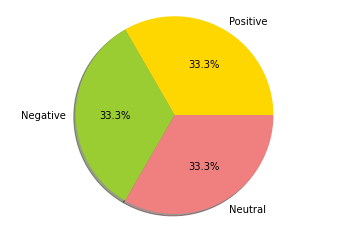

In [ ]:
posi = pos/len(prop)*1000
nega = neg/len(prop)*1000

labels = 'Positive', 'Negative', 'Neutral'
sizes = [posi, nega, 1000-(posi+nega)]
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.show()